# Learning about spatial data and maps for archaeology (and other things)

### Spatial Thinking and Skills Exercise for Theory and Practice

#### Made by Rachel Opitz, Archaeology, University of Glasgow

Understanding the meanings behind patterns of finds recovered through excavation is a tricky problem. We hope to distinguish activity areas, places devoted to domestic and industrial use, or inhabited places that are distinct from liminal ones. To successfully unravel these patterns, we must look not only at the distributions of different types of finds, but how they correlate with one another, the character of the contexts in which they were recovered, and their own physical and social characteristics. Are they likely to be curated? Are they light and likely to be moved from one area to another by post-depositional processes? It's all a bit of a mess. 

The aim of this exercise is for you to:
* learn to work real special finds data from an excavation, in all its messiness
* start thinking about quantitative and spatial approaches to finds data from excavations and how they can help us better understand the patterns we see

You'll do this using data collected by the Gabii Project, a 10+ year excavation in central Italy. 

As you may recall from Archaeology of Scotland, to start working with spatial data and imagery, you need to put together your toolkit. You're currently working inside something called a jupyter notebook. It's a place to keep notes, pictures, code and maps together. You can add tools and data into your jupyter notebook and then use them to ask spatial questions and make maps and visualisations that help answer those questions. 


### Let's get started... Hit 'Ctrl'+'Enter' to run the code in any cell in the page.

In [3]:
%matplotlib inline
# Matplotlib is your tool for drawing graphs and basic maps. You need this!

import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets

# These are what we call prerequisites. They are basic toosl you need to get started.
# Pandas manipulate data. Geo-pandas manipulate geographic data. They're also black and white and like to eat bamboo... 
# You need these to manipulate your data!
# Fiona helps with geographic data.
# Requests are for asking for things. It's good to be able to ask for things.
# ipywidgets supports interactivity.


# Remember to hit Ctrl+Enter to make things happen!

In [4]:
url = 'http://ropitz.github.io/digitalantiquity/data/gabii_SU.geojson'
# This is where I put the data. It's in a format called geojson, used to represent geometry (shapes) and attributes (text).
request = requests.get(url)
# Please get me the data at that web address (url)
b = bytes(request.content)
# I will use the letter 'b' to refer to the data, like a nickname
with fiona.BytesCollection(b) as f:
    crs = f.crs
    gabii_su_poly = gpd.GeoDataFrame.from_features(f, crs=crs)
    print(gabii_su_poly.head())
# I will use the fiona tool to wrap up all the data from 'b', check the coordinate system (crs) listed in the features
# and print out the first few lines of the file so I can check everything looks ok. 
# Don't worry if you don't understand all the details of this part!



  DESCRIPTIO  OBJECTID    SU  Shape_Area  Shape_Length  \
0        BOT         1  9999    0.030028      0.648529   
1         SK         2  1365    0.567181      4.912407   
2         OT         3  1356    0.030045      1.502302   
3         OT         4  1356    0.030902      1.074443   
4         OT         5  1356    0.170833      2.683049   

                                            geometry  
0  POLYGON Z ((1415906.0234 5144201.1941 64.77390...  
1  POLYGON Z ((1415940.4831 5144159.515 62.909799...  
2  POLYGON Z ((1415956.5474 5144171.7637 62.56639...  
3  POLYGON Z ((1415955.8906 5144171.8889 62.62420...  
4  POLYGON Z ((1415956.267 5144171.289 62.6177000...  


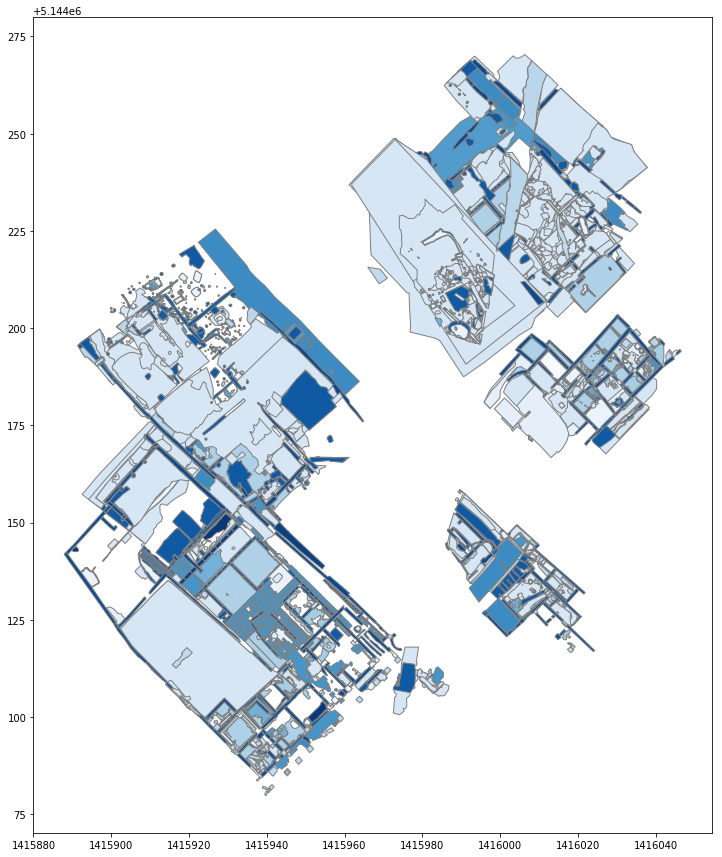

In [5]:
# Now we have polygons, the shapes of our contexts. Let's visualise the data to double check that all is well

gabii_map1 = gabii_su_poly.plot(column='DESCRIPTIO', cmap='Blues', edgecolor='grey', figsize=(15, 15));
# 'plot' means draw me an image showing the geometry of each feature in my data. 
# We want to control things like the color of different types of features on our map. 
# I used the accent colorscale command (cmap stands for 'colour map') 
# and asked it to draw the polygons differently based on the type of feature.


In [6]:
# Now I'm going to bring in all the basic Gabii special finds data - descriptions, object types, IDs and the contexts from which they come.
sf_su = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/spf_SU.csv")
sf_su

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
3,0,80,ceramic fragment,Ceramic Fragment
4,0,82,fish hook,NaN
5,0,83,coin,Coin
6,0,84,coin,Coin
7,0,85,coin,Coin
8,0,86,coin,Coin
9,0,87,coin,Coin


We have quite a few special finds. One of our area supervisors, Troy, is super excited about tools related to textile production. They're a great example of how we think about special finds at Gabii. Multiple types of finds are related to textile production. Do we find all types everywhere? Are certain types of tools more concentrated in one type of context or one area than others? Troy has lots of questions about the patterns of places where we find these tools. Do they provide evidence for early textile production? Are they a major factor in the city's early wealth? Do we find the same things in later periods? After all, people under the Republic and Empire wore clothes... Loom Weights, spools, and spindle whorls are the most common weaving tools at Gabii.


In [7]:
#Let's pull all those find types out of the big list.
types = ['Loom Weight','Spool','Spindle Whorl']
textile_tools = sf_su.loc[sf_su['SF_OBJECT_TYPE'].isin(types)]
textile_tools

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
25,0,375,spool,Spool
33,0,564,spool,Spool
34,0,565,loom weight,Loom Weight
36,0,567,spool,Spool
38,0,651,spindle whorl,Spindle Whorl
46,0,709,loom weight,Loom Weight
48,0,711,loom weight,Loom Weight
64,0,952,spindle whorl,Spindle Whorl
92,0,1226,Spool fragment,Spool
94,0,1250,Spindle whorl fragment,Spindle Whorl


In [9]:
# Now let's count up how many of these tools appear in each context.
pd.value_counts(textile_tools['SU'].values, sort=True)

0       18
3171    10
3227     9
3259     6
8118     6
2385     5
3166     5
8318     5
2748     5
1279     5
2558     5
1016     5
7180     4
3070     4
3306     4
2551     3
5171     3
398      3
2879     3
4009     3
2819     3
3298     3
3776     3
2425     3
3504     3
3021     3
2002     3
3131     2
3110     2
2419     2
        ..
2765     1
3453     1
427      1
3267     1
2492     1
3263     1
3305     1
2237     1
5622     1
1412     1
4022     1
2788     1
3774     1
5303     1
3848     1
3333     1
4014     1
2817     1
3328     1
4015     1
432      1
2552     1
3318     1
3317     1
3059     1
5873     1
3508     1
3310     1
3560     1
2538     1
Length: 216, dtype: int64

In [10]:
#Then let's combine our polygons representing context shape and location
#with the special finds data
gabii_textools = gabii_su_poly.merge(textile_tools, on='SU')
gabii_textools.head()

,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,DEP,28,2258,77.018159,45.450094,POLYGON Z ((1416013.191 5144212.5308 61.347999...,1797,Spool,Spool
1,DEP,44,516,43.687257,39.119255,POLYGON Z ((1415914.1831 5144202.0853 64.69299...,261,spool,Spool
2,DEP,44,516,43.687257,39.119255,POLYGON Z ((1415914.1831 5144202.0853 64.69299...,274,loom weight,Loom Weight
3,DEP,53,587,63.212851,42.805154,POLYGON Z ((1415907.6408 5144196.9608 64.63250...,262,loom weight,Loom Weight
4,DEP,77,1306,21.609902,35.183961,POLYGON Z ((1415935.544 5144182.803 63.4133000...,595,spool,Spool


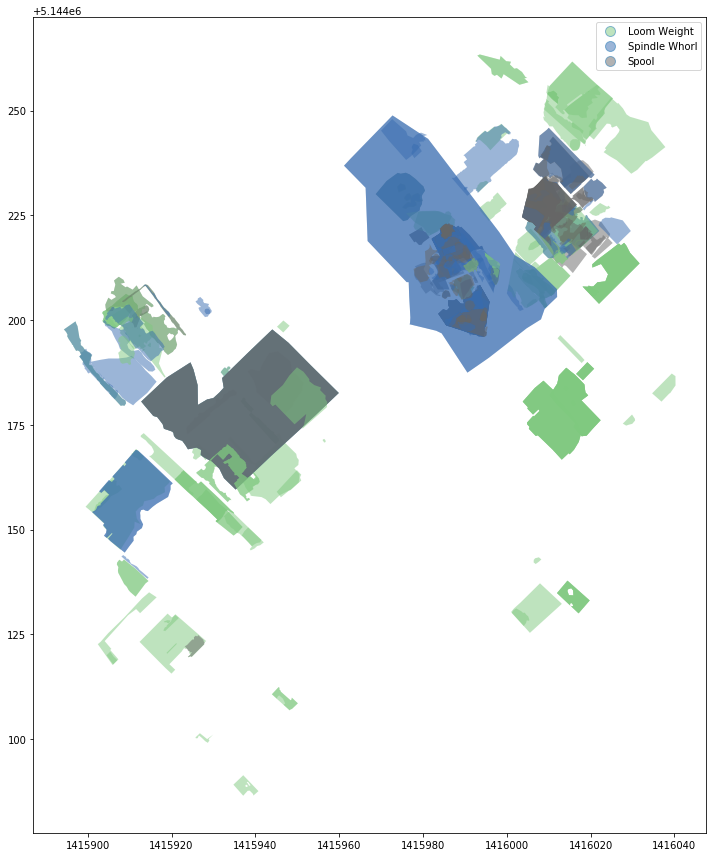

In [11]:
# If we want to see this result as a map, we just add the .plot command to the end.

gabii_textools.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

OK, what do you see here? Compare the distribution of each type of textile tool. Do some types seem to be concentrated in certain areas? How might you check? What factors might contribute to this pattern? Do big layer simply aggregate lots of stuff? Do late dumps contain early materials? Why would one type of tool appear where the others don't?

In [12]:
gabii_textools.sort_values(by=['Shape_Area'],ascending=False)

,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
198,DEP,3216,3256,1452.330497,168.149143,POLYGON Z ((1415990.6115 5144187.4691 63.10000...,1021,spindle whorl,Spindle Whorl
197,DEP,3216,3256,1452.330497,168.149143,POLYGON Z ((1415990.6115 5144187.4691 63.10000...,1000,spindle whorl,Spindle Whorl
99,DEP,1886,1016,836.932636,140.946953,POLYGON Z ((1415912.7683 5144180.5634 64.61389...,1993,spool,Spool
95,DEP,1886,1016,836.932636,140.946953,POLYGON Z ((1415912.7683 5144180.5634 64.61389...,30,spindle whorl,Spindle Whorl
97,DEP,1886,1016,836.932636,140.946953,POLYGON Z ((1415912.7683 5144180.5634 64.61389...,1991,spindle whorl frag,Spindle Whorl
98,DEP,1886,1016,836.932636,140.946953,POLYGON Z ((1415912.7683 5144180.5634 64.61389...,1992,spool,Spool
96,DEP,1886,1016,836.932636,140.946953,POLYGON Z ((1415912.7683 5144180.5634 64.61389...,110,loom weight,Loom Weight
158,DEP,2832,5091,228.505382,77.127003,POLYGON Z ((1415920.2784 5144161.05 64.1092000...,786,spindle whorl,Spindle Whorl
159,DEP,2832,5091,228.505382,77.127003,POLYGON Z ((1415920.2784 5144161.05 64.1092000...,824,spindle whorl,Spindle Whorl
139,DEP,2726,5052,202.047281,70.069538,POLYGON Z ((1415911.5608 5144169.1629 64.83879...,757,loom weight,Loom Weight


In [13]:
# We have a couple enormous colluvial layers that should probably be excuded.
# Outliers will mess with your analysis. Cut out these layers.
gabii_textools2 = gabii_textools.loc[gabii_textools['Shape_Area']<800]
# If we want to see this result as a map, we just add the .plot command to the end.


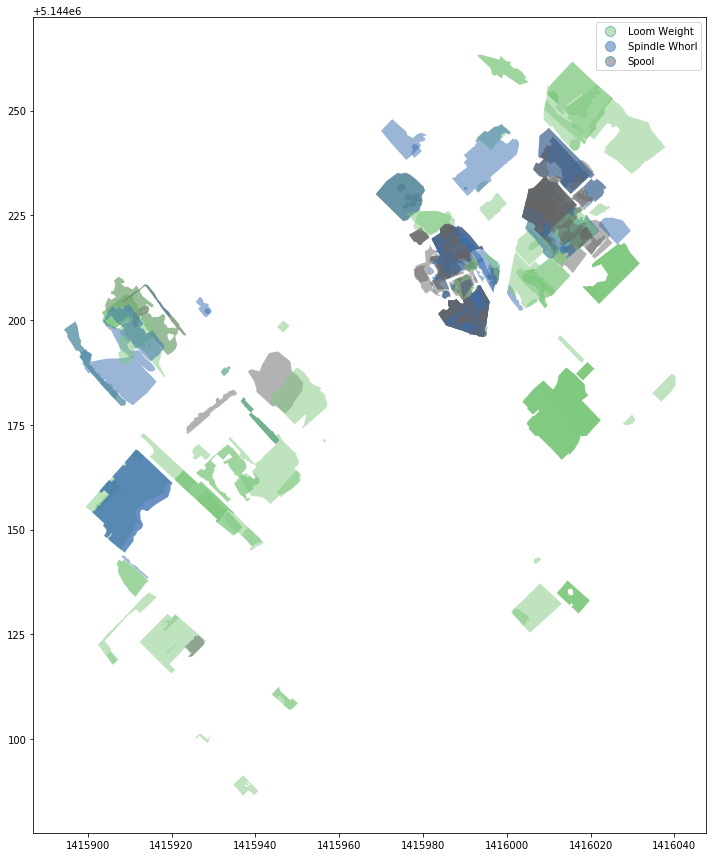

In [14]:
# That's better.
gabii_textools2.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

In [15]:
# OK, count up how many of each tool type appears in each context
textools_counts = gabii_textools2.groupby('SU')['SF_OBJECT_TYPE'].value_counts().unstack().fillna(0)
textools_counts.sort_values(by=['Loom Weight','Spindle Whorl','Spool'], ascending=False)

SF_OBJECT_TYPE,Loom Weight,Spindle Whorl,Spool
SU,,,
8118,18.0,0.0,0.0
8318,10.0,0.0,0.0
427,8.0,0.0,0.0
2385,5.0,0.0,0.0
2002,4.0,4.0,4.0
1279,4.0,1.0,0.0
3118,4.0,0.0,0.0
5572,4.0,0.0,0.0
7180,4.0,0.0,0.0


In [16]:
# Merge your textile tool counts with your spatial data for the contexts
gabii_textools_counts = gabii_su_poly.merge(textools_counts, on='SU')
gabii_textools_counts.head()

,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,Loom Weight,Spindle Whorl,Spool
0,DEP,28,2258,77.018159,45.450094,POLYGON Z ((1416013.191 5144212.5308 61.347999...,0.0,0.0,1.0
1,DEP,44,516,43.687257,39.119255,POLYGON Z ((1415914.1831 5144202.0853 64.69299...,1.0,0.0,1.0
2,DEP,53,587,63.212851,42.805154,POLYGON Z ((1415907.6408 5144196.9608 64.63250...,1.0,0.0,0.0
3,DEP,77,1306,21.609902,35.183961,POLYGON Z ((1415935.544 5144182.803 63.4133000...,0.0,0.0,1.0
4,DEP,115,1327,122.494594,52.841679,POLYGON Z ((1415936.349 5144162.362 63.1217999...,1.0,0.0,0.0


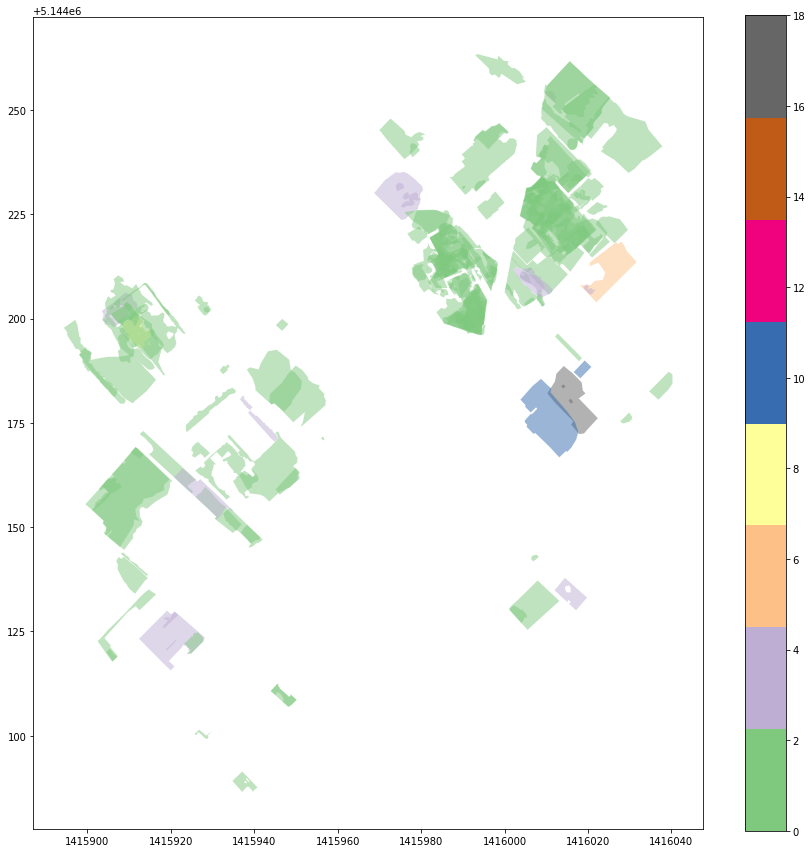

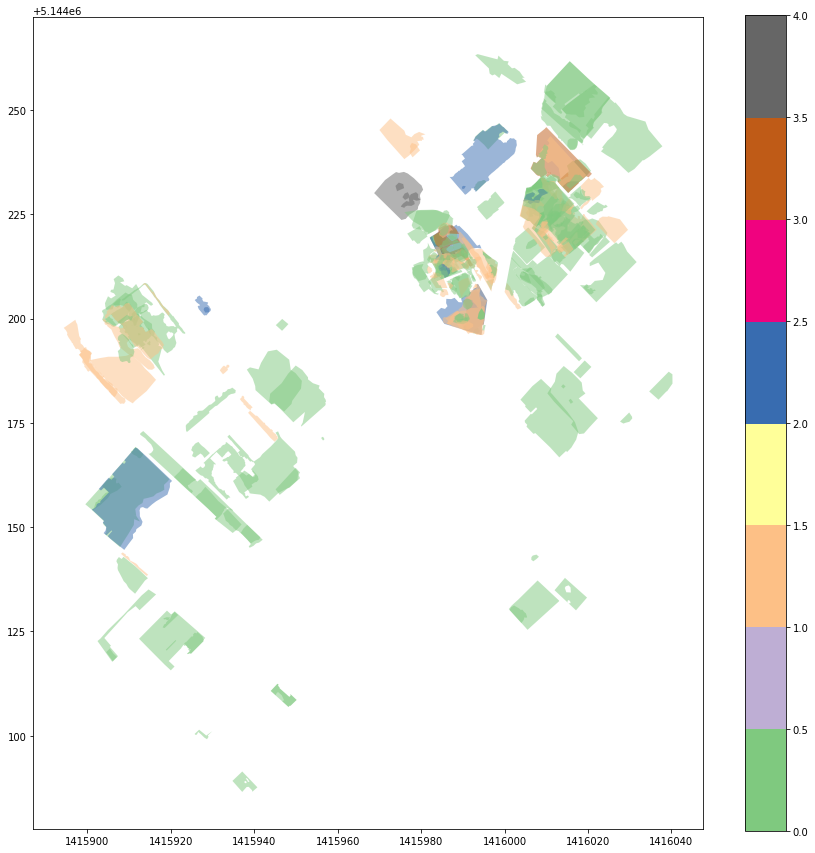

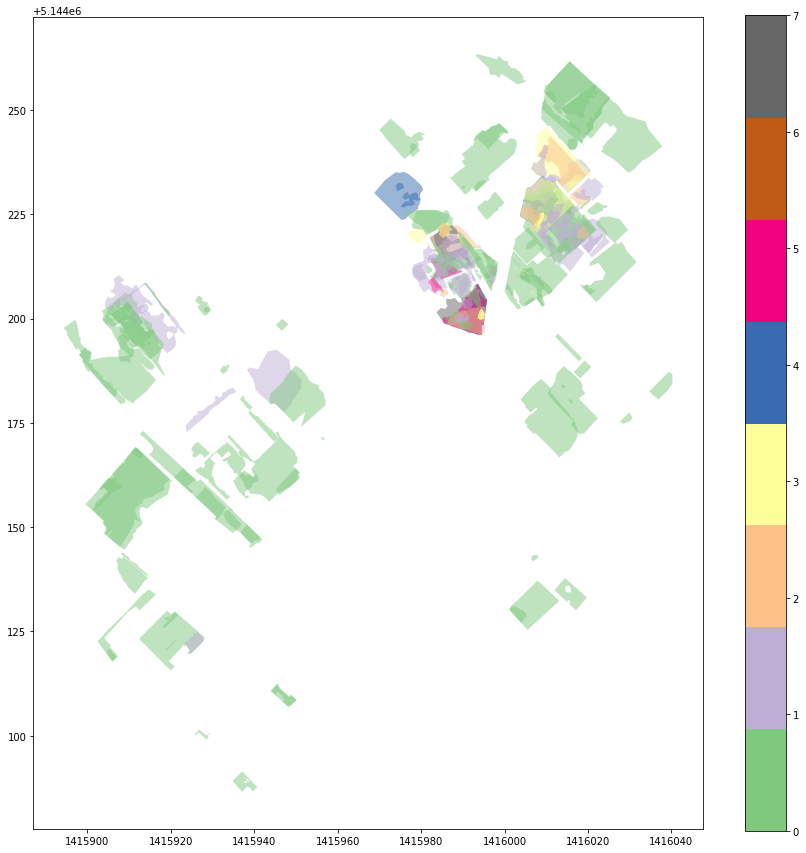

In [17]:
# Plot the counts of each type of find spatially
gabii_textools_counts.plot(column='Loom Weight', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)
gabii_textools_counts.plot(column='Spindle Whorl', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)
gabii_textools_counts.plot(column='Spool', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)


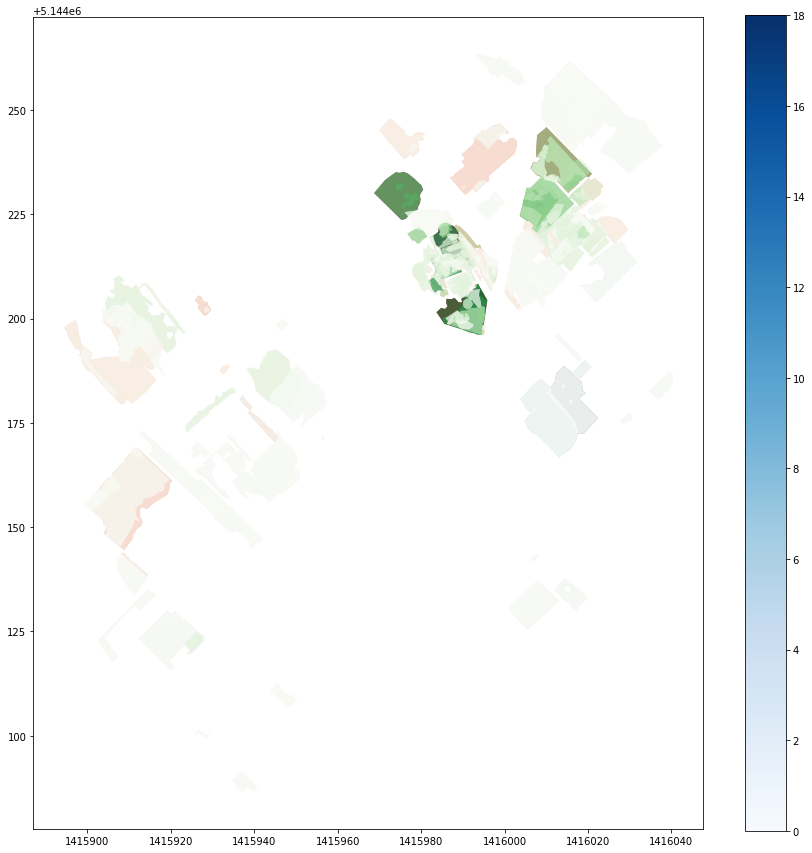

In [18]:
base = gabii_textools_counts.plot(column='Loom Weight', cmap='Blues', figsize=(15, 15), legend=True, alpha=0.7)
gabii_textools_counts.plot(ax=base, column='Spindle Whorl', cmap='Reds', alpha=0.7)
gabii_textools_counts.plot(ax=base, column='Spool', cmap='Greens', alpha=0.7);


(1415887.009595, 1416047.574505, 5144077.642320001, 5144272.24288)

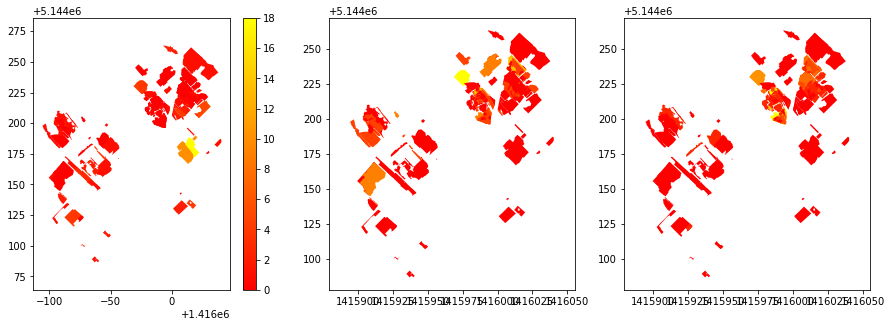

In [24]:
# It's hard to see what's happening when we have to scroll. 
# Let's put the maps side by side.
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3,figsize=(15, 5))
gabii_textools_counts.plot(column='Loom Weight', cmap='autumn',  ax=axes[0], legend=True).axis('equal')
gabii_textools_counts.plot(column='Spindle Whorl', cmap='autumn', ax=axes[1]).axis('equal')
gabii_textools_counts.plot(column='Spool', cmap='autumn',ax=axes[2]).axis('equal')

In [25]:
# Clearly the distributions of different weaving tools vary.
# We are going to need more tools.
import pysal
from sklearn import cluster
import seaborn as sns
import numpy as np

/srv/conda/lib/python3.6/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [26]:
# Next step: cluster together contexts where the pattern of the three types of textile tools are similar, 
# with and without respect to the size of the context.
# Make 5 clusters and account for the size of the context.
km5 = cluster.KMeans(n_clusters=5)
km5cls = km5.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
km5cls

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

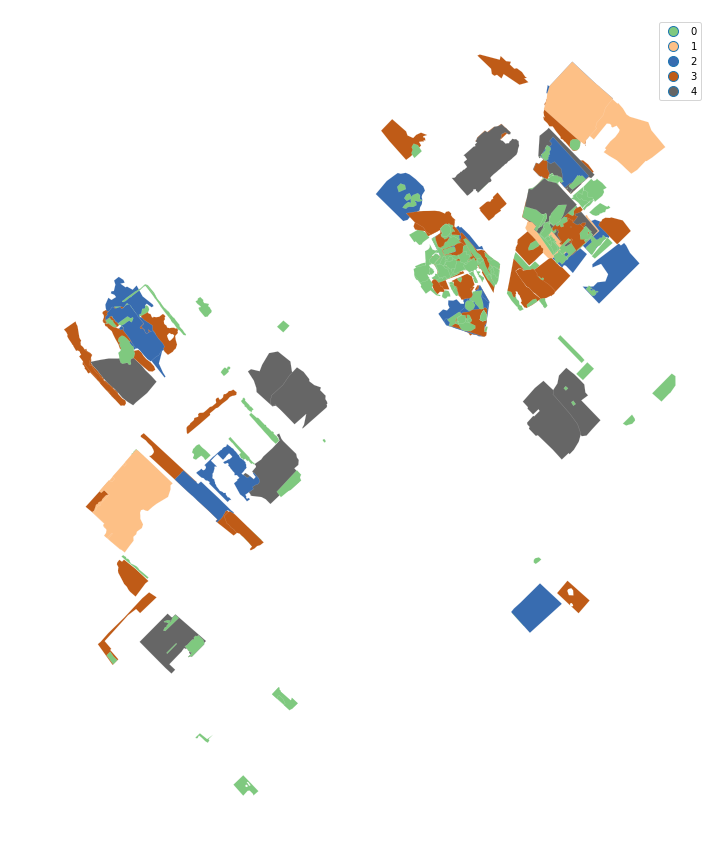

In [27]:
# plot the clusters, groups of contexts that have similar textile tool assemblages.

f1, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

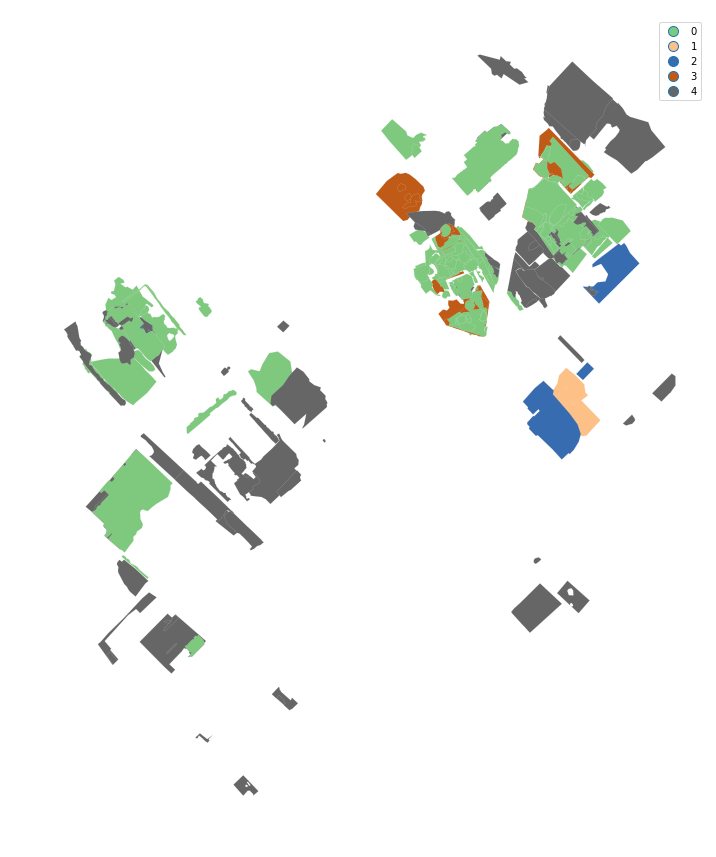

In [28]:
#Do the same, ignoring the size of the context.
km5 = cluster.KMeans(n_clusters=5)
km5cls2 = km5.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f2, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

The patterns are definitely different. How can we interpret the fact that context size affects the pattern of the distribution of textile tools? Do big units, which perhaps represent dumps or colluvial mashups, have a fundamentally different character than the varied small contexts?

(1415887.0095949997, 1416047.5745049997, 5144077.642320001, 5144272.24288)

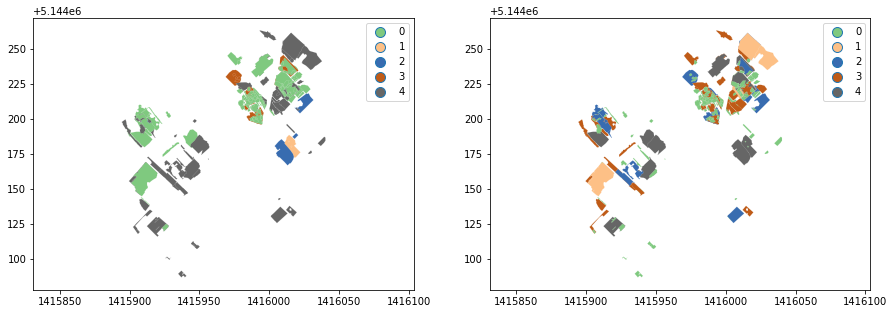

In [29]:
# Look at the difference with and without context size taken into accoutn.
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
gabii_textools_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[0]).axis('equal')
gabii_textools_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[1]).axis('equal')



In [30]:
# assign the cluster IDs to each context permanently
gabiitextools_clas = gabii_textools_counts.assign(cl=km5cls.labels_)
gabiitextools_class = gabiitextools_clas.assign(cl2=km5cls2.labels_)
gabiitextools_class.head()

,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,Loom Weight,Spindle Whorl,Spool,cl,cl2
0,DEP,28,2258,77.018159,45.450094,POLYGON Z ((1416013.191 5144212.5308 61.347999...,0.0,0.0,1.0,2,0
1,DEP,44,516,43.687257,39.119255,POLYGON Z ((1415914.1831 5144202.0853 64.69299...,1.0,0.0,1.0,3,0
2,DEP,53,587,63.212851,42.805154,POLYGON Z ((1415907.6408 5144196.9608 64.63250...,1.0,0.0,0.0,2,4
3,DEP,77,1306,21.609902,35.183961,POLYGON Z ((1415935.544 5144182.803 63.4133000...,0.0,0.0,1.0,3,0
4,DEP,115,1327,122.494594,52.841679,POLYGON Z ((1415936.349 5144162.362 63.1217999...,1.0,0.0,0.0,4,4


(1415891.3709749999, 1416036.1953249997, 5144113.125025001, 5144254.3864750005)

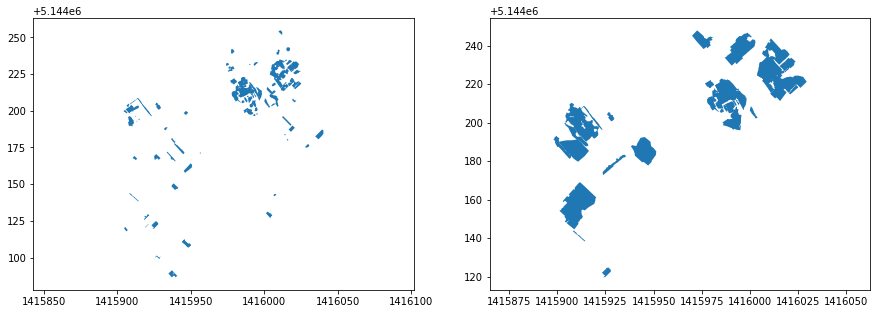

In [31]:
# Now let's look at some individual classes, with and without context size accounted for in the analyses.
gabiitextools_class0=gabiitextools_class.loc[gabiitextools_class['cl']==0]
gabiitextools_class0noarea=gabiitextools_class.loc[gabiitextools_class['cl2']==0]
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
gabiitextools_class0.plot(ax=axes[0], legend=True).axis('equal')
gabiitextools_class0noarea.plot(ax=axes[1]).axis('equal')

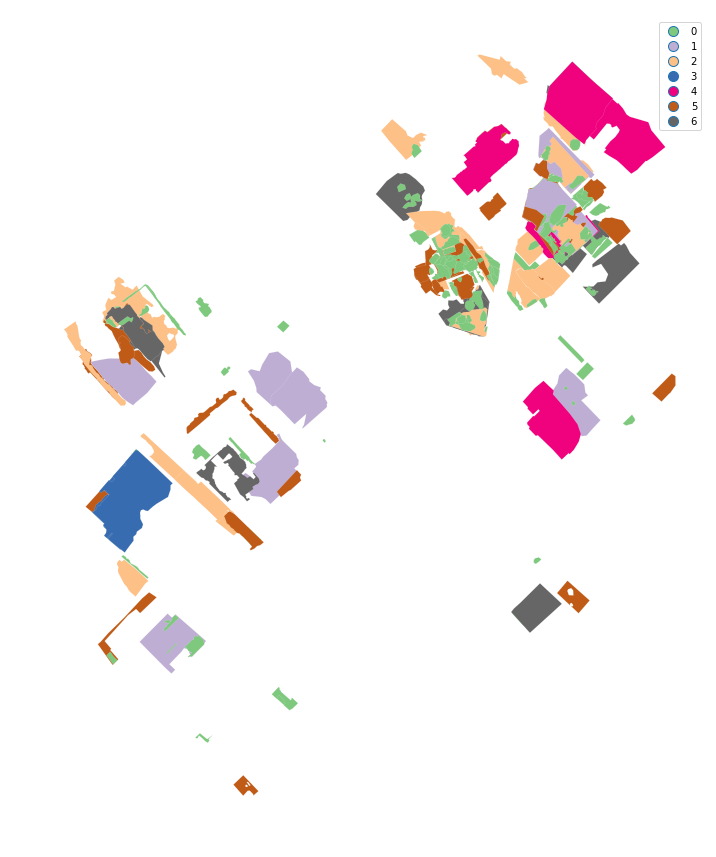

In [32]:
# What happens when we change the number of clusters (groups)?
km7 = cluster.KMeans(n_clusters=7)
km7cls3 = km7.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
f3, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl3=km7cls3.labels_)\
   .plot(column='cl3', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

That also changes things. Without going into too much detail, finding the ideal number of clusters is a black art. Try playing around with the number of clusters in the notebook, or the size cut-off for inclusion. Clustering = black magic

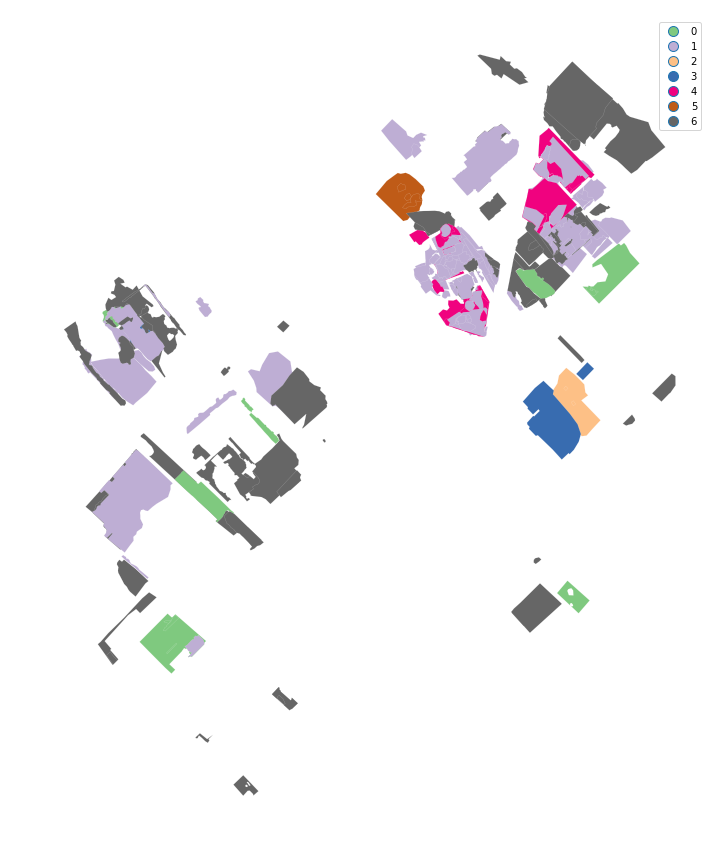

In [33]:
# Use 7 clusters and plot them
km7 = cluster.KMeans(n_clusters=7)
km7cls4 = km7.fit(gabii_textools_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f4, ax = plt.subplots(1, figsize=(15,15))

gabii_textools_counts.assign(cl4=km7cls4.labels_)\
   .plot(column='cl4', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

In [34]:
# Let's set up to investigate some of the individual clusters
gabiitextools_class3=gabiitextools_class.assign(cl3=km7cls3.labels_)
gabiitextools_class4=gabiitextools_class3.assign(cl4=km7cls4.labels_)
gabiitextools_class4.head()


,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,Loom Weight,Spindle Whorl,Spool,cl,cl2,cl3,cl4
0,DEP,28,2258,77.018159,45.450094,POLYGON Z ((1416013.191 5144212.5308 61.347999...,0.0,0.0,1.0,2,0,6,1
1,DEP,44,516,43.687257,39.119255,POLYGON Z ((1415914.1831 5144202.0853 64.69299...,1.0,0.0,1.0,3,0,2,6
2,DEP,53,587,63.212851,42.805154,POLYGON Z ((1415907.6408 5144196.9608 64.63250...,1.0,0.0,0.0,2,4,6,6
3,DEP,77,1306,21.609902,35.183961,POLYGON Z ((1415935.544 5144182.803 63.4133000...,0.0,0.0,1.0,3,0,5,1
4,DEP,115,1327,122.494594,52.841679,POLYGON Z ((1415936.349 5144162.362 63.1217999...,1.0,0.0,0.0,4,4,1,6


Text(0.5,1,'cl - 7 clusters - no area')

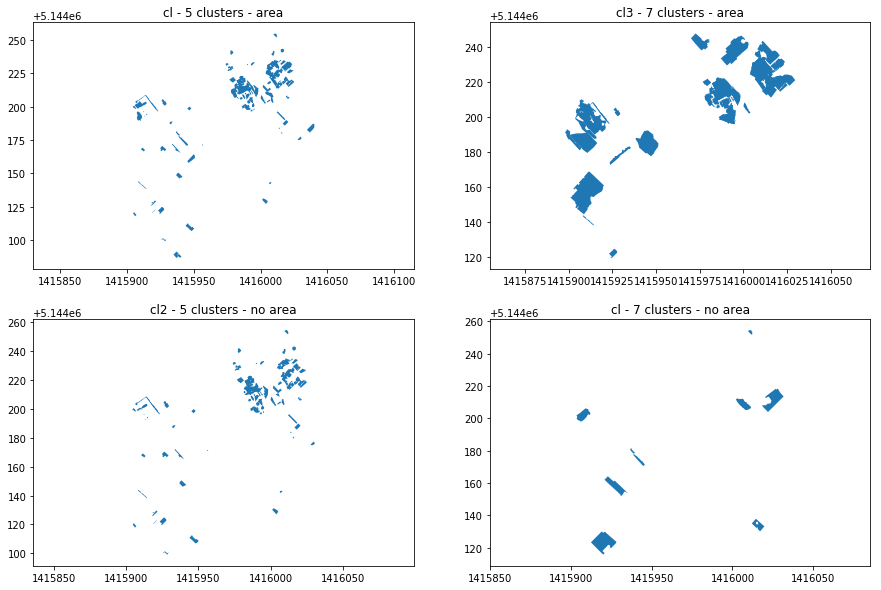

In [35]:
# set up variables to store several classes, with and without context size taken into account.
gabiitextools_class0=gabiitextools_class4.loc[gabiitextools_class4['cl']==0]
gabiitextools_class0noarea=gabiitextools_class4.loc[gabiitextools_class4['cl2']==0]
gabiitextools_k7_class0=gabiitextools_class4.loc[gabiitextools_class4['cl3']==0]
gabiitextools_k7_class0noarea=gabiitextools_class4.loc[gabiitextools_class4['cl4']==0]
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiitextools_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title('cl - 5 clusters - area')
gabiitextools_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title('cl2 - 5 clusters - no area')
gabiitextools_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('cl3 - 7 clusters - area')
gabiitextools_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('cl - 7 clusters - no area')

Text(0.5,1,'cl - 7 clusters - no area')

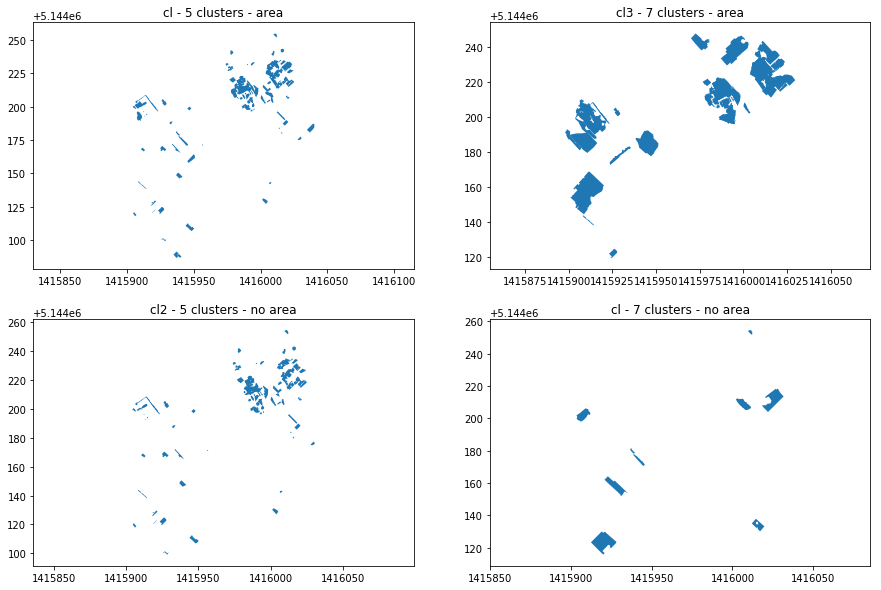

In [36]:
gabiitextools_class3=gabiitextools_class4.loc[gabiitextools_class4['cl']==3]
gabiitextools_class3noarea=gabiitextools_class4.loc[gabiitextools_class4['cl2']==3]
gabiitextools_k7_class3=gabiitextools_class4.loc[gabiitextools_class4['cl3']==3]
gabiitextools_k7_class3noarea=gabiitextools_class4.loc[gabiitextools_class4['cl4']==3]
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiitextools_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title('cl - 5 clusters - area')
gabiitextools_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title('cl2 - 5 clusters - no area')
gabiitextools_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('cl3 - 7 clusters - area')
gabiitextools_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('cl - 7 clusters - no area')

In [37]:
# Maybe some of our (especially the small ones) contexts are similar to or influenced by their immediate neighbours (surroundings)
# We can weight the values in one context to account for its neighbour friends.
w5 = pysal.weights.KNN.from_dataframe(gabiitextools_class4, k=5)
w5.transform = 'r'
 #neighbors & weights of the 5th observation (0-index remember)
w5[4]

{70: 0.2, 29: 0.2, 89: 0.2, 49: 0.2, 53: 0.2}

In [38]:
# print out a context and its immediate neigbours as a table
self_and_neighbors = [4]
self_and_neighbors.extend(w5.neighbors[4])
print(self_and_neighbors)
gabiitextools_class4.loc[self_and_neighbors]

[4, 70, 29, 89, 49, 53]


,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,Loom Weight,Spindle Whorl,Spool,cl,cl2,cl3,cl4
4,DEP,115,1327,122.494594,52.841679,POLYGON Z ((1415936.349 5144162.362 63.1217999...,1.0,0.0,0.0,4,4,1,6
70,DEP,2007,1412,14.598572,18.034358,POLYGON Z ((1415950.9555 5144163.0872 62.55220...,1.0,0.0,0.0,0,4,5,6
29,DEP,1204,1182,6.973412,20.548798,POLYGON Z ((1415939.8974 5144165.7659 63.16879...,1.0,0.0,0.0,0,4,0,6
89,FL,2647,1173,62.610385,86.251233,POLYGON Z ((1415934.0065 5144169.8251 63.22079...,2.0,0.0,0.0,2,4,6,6
49,DEP,1766,1279,14.907877,31.751468,POLYGON Z ((1415936.5361 5144180.7074 63.37669...,4.0,1.0,0.0,0,4,5,0
53,N-S TOMB,1815,1380,0.384362,2.404675,POLYGON Z ((1415956.7658 5144170.944 62.338099...,1.0,0.0,0.0,0,4,0,6


In [39]:
# Do the same thing with another set
# You can substitute other values for the '11' here and see what happens.
w5[11]
self_and_neighbors = [11]
self_and_neighbors.extend(w5.neighbors[11])
print(self_and_neighbors)
gabiitextools_class4.loc[self_and_neighbors]


[11, 79, 128, 126, 5, 107]


,DESCRIPTIO,OBJECTID,SU,Shape_Area,Shape_Length,geometry,Loom Weight,Spindle Whorl,Spool,cl,cl2,cl3,cl4
11,DEP,267,3012,35.964558,24.642614,POLYGON Z ((1415981.4906 5144220.1063 61.93349...,1.0,0.0,0.0,3,4,2,6
79,DEP,2202,3089,41.966089,30.456902,POLYGON Z ((1415984.002 5144225.9554 61.885899...,1.0,0.0,0.0,3,4,2,6
128,FILL,3375,3311,5.350597,8.938988,POLYGON Z ((1415984.1495 5144221.7165 61.46430...,0.0,0.0,2.0,0,0,0,1
126,DEP,3361,3306,8.341407,12.880923,POLYGON Z ((1415984.0478 5144221.7844 61.49159...,0.0,1.0,3.0,0,3,0,4
5,FILL,134,3021,10.873247,13.556097,POLYGON Z ((1415976.6777 5144220.3635 61.86689...,0.0,0.0,3.0,0,0,0,4
107,DEP,2808,3167,9.853576,13.615772,"POLYGON Z ((1415982.0646 5144219.3923 61.6106,...",0.0,0.0,1.0,0,0,0,1


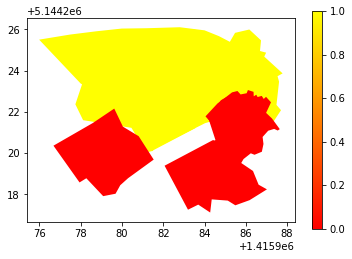

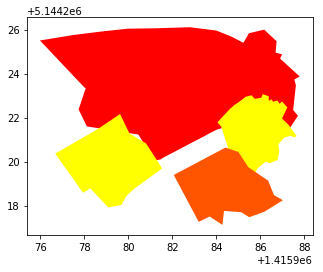

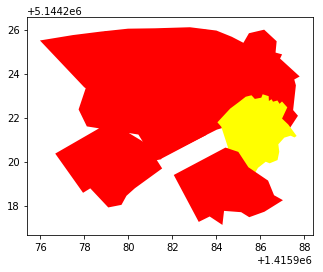

In [40]:
# Sanity check by plotting a set of self and neighbours as a map.
# Do the counts of differnt textile tools have similar patterns?
# Are they inconsistent? How might we interpret this local pattern?
n11 = gabiitextools_class4.loc[self_and_neighbors]
n11.plot(column='Loom Weight', cmap='autumn', legend=True)
n11.plot(column='Spool', cmap='autumn')
n11.plot(column='Spindle Whorl', cmap='autumn')

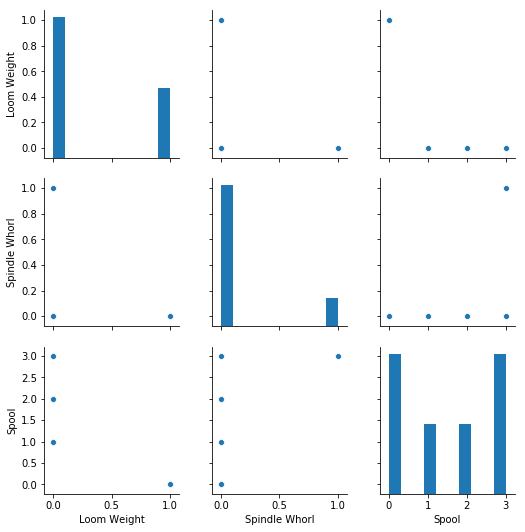

In [41]:
# We can visualise how the counts of different types of finds appear in other ways.
# Do loom weights appear more often when spools do? What does this mean?
sns.pairplot(n11.drop(['SU','geometry','OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','cl','cl2','cl3','cl4'], axis=1))


/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


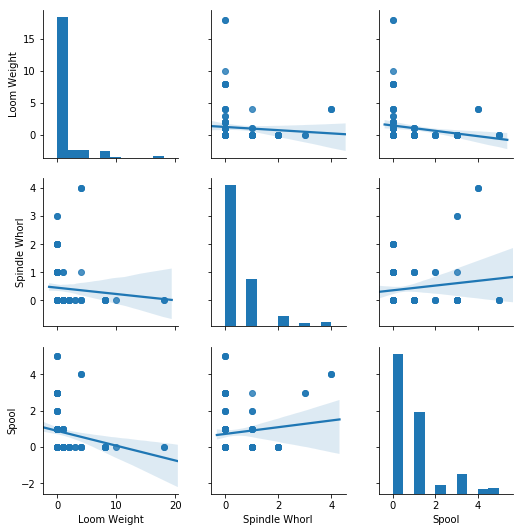

In [46]:
# Are some clusters more correlated than others?
sns.pairplot(gabiitextools_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()


/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


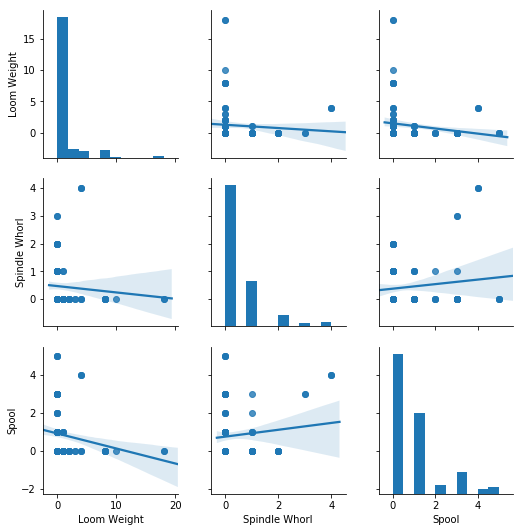

In [47]:
# Do 7 clusters as oppossed to 5 result in more correlation?
sns.pairplot(gabiitextools_k7_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()

### That concludes this tutorial.

Hopefully you have:
* started thinking (and perhaps are a bit confused) about how spatial patterns of different types of finds are created, and how we can interpret them when studying data from an excavation.
* learned to combine spatial data and descriptive tables. 
* learned to use some basic clustering tools, and reinforced your knowledge about how to make charts and maps. 

We'll be talking more about spatial analysis methods in archaeology throughout the course.